*Librería*

In [1]:
import cv2

*Lectura de Imagen*

In [3]:
img=cv2.imread('img13.jpeg')
cv2.imshow('IMG',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

*Filtro*

In [6]:
import cv2
import numpy as np

img = cv2.imread('img13.jpeg',0)

fil,col = img.shape

imgM=np.zeros((fil-2,col-2),np.uint8)

for j in range(1,fil-1):
    for i in range(1,col-1):
        a=img[j-1,i-1]
        b=img[j,i-1]
        c=img[j+1,i-1]
        d=img[j-1,i]
        e=img[j,i]
        f=img[j+1,i]
        g=img[j-1,i+1]
        h=img[j,i+1]
        k=img[j+1,i+1]

        A_p=[[a,b,c,d,e,f,g,h,k]]
        #Determinación de mediana
        pix=np.median(A_p)
        #Sobreescribimos los pixeles
        imgM[j-1,i-1]=pix

cv2.imshow('Imagen Original',img)
cv2.imshow('Filtro de la mediana',imgM)

cv2.waitKey(0)
cv2.destroyAllWindows()

*Histograma*

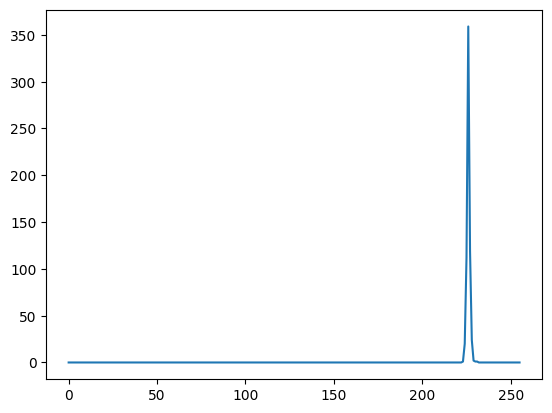

In [8]:
import cv2
import matplotlib.pyplot as plt

hist=cv2.calcHist(imgM,[0], None, [256], [0,255])
plt.plot(hist)
plt.show()
cv2.imshow('IMG',imgM)
cv2.waitKey(0)
cv2.destroyAllWindows()

*Binarizacion*

In [9]:
import cv2

_,imgB=cv2.threshold(imgM,150,255,cv2.THRESH_BINARY) #

cv2.imshow('IMG',imgM)
cv2.imshow('IMG2',imgB)
cv2.waitKey(0)
cv2.destroyAllWindows()

*Intervalo de Umbral Binario Invertido*

In [11]:
import cv2
import numpy as np

imgO= np.zeros(imgM.shape,np.uint8)
rows = imgM.shape[0]
cols = imgM.shape[1]

for j in range(rows):
    for i in range(cols):
        if imgM[j,i]<=100 or imgM[j,i]>=150:
            imgO[j,i]=0
        else:
            imgO[j,i]=255

cv2.imshow('IMG',imgM)
cv2.imshow('IMG2',imgO)
cv2.waitKey(0)
cv2.destroyAllWindows()

*Conteo de círculos*

In [12]:
#DIBUJAR CONTORNOS , CONTAR OBJETOs
import cv2
import matplotlib.pyplot as plt

#
contornos,_=cv2.findContours(imgO.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img,contornos,-1, (0,255,0),1)

cont=0
for contour in contornos:
    cont=cont+1
    x,y,w,h=cv2.boundingRect(contour)
    cv2.rectangle(img,(x,y),(x+w,y+h),(100,255,100),1)
print(cont)
#

5
